<a href="https://colab.research.google.com/github/htapiagroup/fis_uv/blob/master/ICD_FisUV_Sem2_Exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a la Ciencia de Datos

## Overview 
Duration: 0:02:00

* Definicion del problema
* Accediendo a los datos
* Exploracion de los datos
* Modelos

## Iris data set
Duration: 0:00:30

El conjunto de [datos asociado a las flores de iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) es un ejemplo sencillo que nos permitira conocer el proceso general de un trabajo de ciencia de datos.

En la imagen siguiente pueden ver las caracterisitas que estan registradas en cada columna:
![iris](img/03_iris.png)

## Accediendo a los datos
Duration: 0:05:00

Para acceder a los datos usaremos la libreria [`pandas`](https://pandas.pydata.org). Tipicamente, las funcionalidades avanzadas en el lenguaje de programacion Python se encapsulan en librerias externas. En el area del analisis de datos, `numpy` y `pandas` sobresalen para el analisis de datos estructurados, `seaborn` y `matplotlib` para la visualizacion y `scikit-learn`, `keras`, `pytorch` y `tensorflow` para el modelado avanzado de datos, entre muchos otros.

Accedemos a los recursos disponibles en una libreria externa con un comando como el siguiente

In [0]:
import pandas as pd

La sintaxis anterior proporciona acceso a toda la funcionalidad disponible en la libreria `pandas` en el *alias* `pd`, de modo que si queremos usar una funcion o modulo disponible en dicha librearia usaremos la "palabra" `pd` para invocarla. Como ejemplo vamos a importar los datos de flores de iris de Fisher a la sesion usando el lector de archivos separados por coma (csv) disponible en `pandas` como sigue

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

Con la sintaxis anterior leemos el archivo indicado por la cadena de texto 

> `
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
`

especificando que el encabezado de cada columna tiene el identificador proporcionado en 



> `names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']`
  
El objeto que resulta, `dataset` se denomina un **Dataframe** y contiene una diversidad de funcionalidades que permiten explorar y analizar la informacion contenida en el archivo original. Por ejemplo podemos conocer las dimensiones evaluando

In [0]:
dataset.shape

(150, 5)

El resultado de la evaluacion anterior regresa una tupla `(r, c)` que indica el numero de renglones `r` y columnas `c` que contiene el archivo. Podemos ver los primeros 5 (10) renglones de datos evaluando

In [0]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
o los ultimos cinco:

In [0]:
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Que pasa si evaluan
> `dataset.head(25)`



In [0]:
# class distribution
agrupaPorEspecie=dataset.groupby("class")

In [0]:
agrupaPorEspecie.size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Exploracion

In [0]:
dataset["class"]

In [0]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


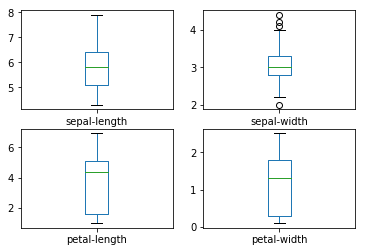

In [0]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False);

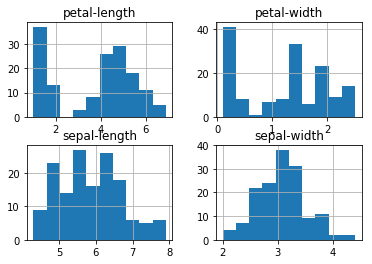

In [0]:
dataset.hist();

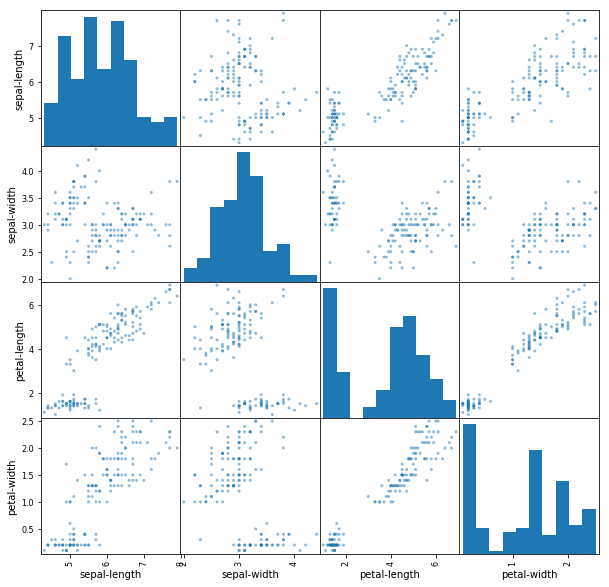

In [0]:
pd.plotting.scatter_matrix(dataset, figsize=(10,10));

In [0]:
colors = dataset['class'].replace({'Iris-setosa':'red', 'Iris-virginica': 'green', 'Iris-versicolor':'blue'})  

In [0]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False);

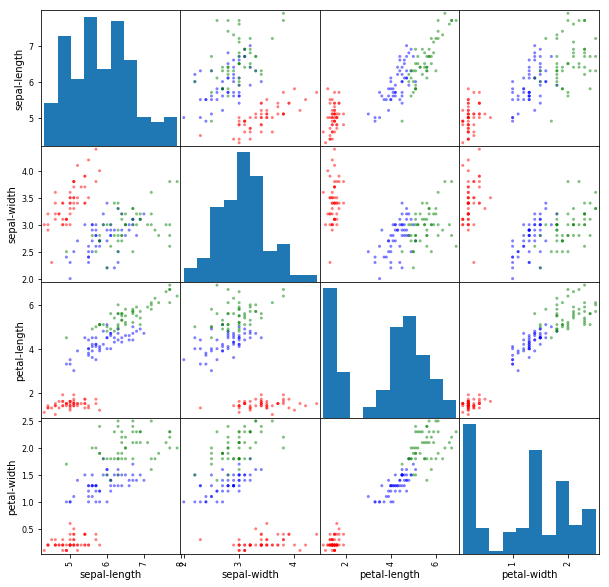

In [0]:
pd.plotting.scatter_matrix(dataset, c=colors,figsize=(10,10));

### `seaborn`: una libreria espcializada para visualizacion

In [0]:
import seaborn as sns
sns.set_palette('husl')

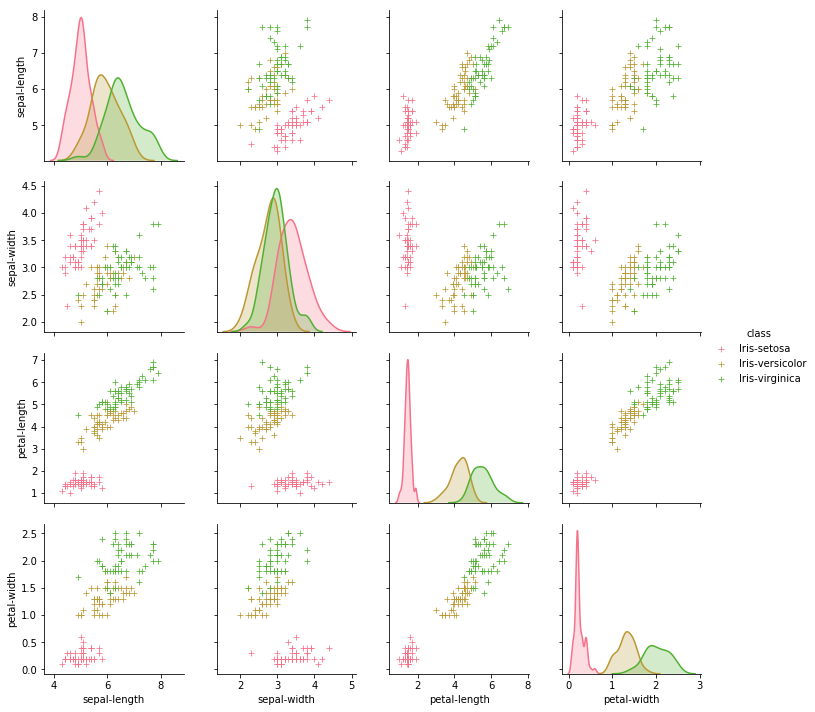

In [0]:
g = sns.pairplot(dataset, hue='class', markers='+')

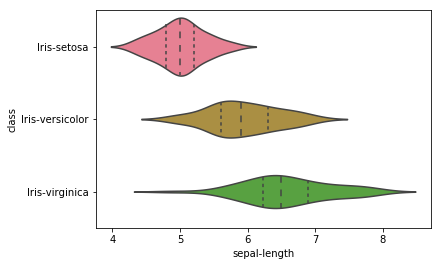

In [0]:
g = sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')

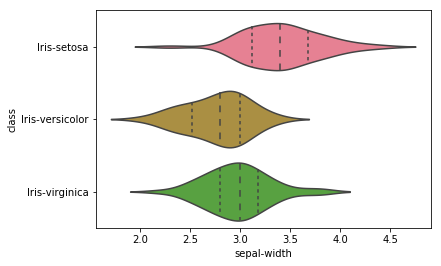

In [0]:
g = sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')

## Ejercicios

* En el conjunto de datos de flores de iris de Fisher, ¿qué tipo de problema se tiene? Especificar.
* De la exploración realizada hasta el momento, ¿es posible con el conjunto de datos que se tiene?
* ¿Cuáles son las mejores estrategias para hacerlo?

## Modelacion

Probaremos los siguientes algorimtos

* Logistic Regression (LR)
* K-Nearest Neighbors (KNN)
* Linear Discriminant Analysis (LDA)
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).


<!-- from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC -->


En el ambito suelen separarse del conjunto de datos, aquellas variables que representan la informacion que se quiere conocer (variables dependientes) y de la que dependen. A estas ultimas se le conocen como atributos o caracteristicas y suelen denotarse por $X$. Es decir $X$ representa la matriz que contiene la informacion de las variables dependientes del sistema, en ocasiones tambien llamada matriz de diseño, mientras que la (o las) variables dependientes se denominan por $y$. (En la mayoria de los problemas $y$ es una columna con los objetivos, valores, de cada renglon en la matriz $X$). 

En el conjunto de Fisher estamos interesados en predecir la clase (objetivo) a la que una instancia (columnas) pertenece asi que separamos los datos de la siguiente forma 

In [0]:
X = dataset.drop(['class'], axis=1)
y = dataset['class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


La libreria `sklearn` contiene funciones que permiten evaluar distintos modelos sobre los datos de manera casi automatica. Primer importamos la libreria usando

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Un modelo se evalua usando "metricas", cantidades que ayudan a determinar la calidad del resultado. 

In [0]:
from sklearn import metrics

In [0]:
metrics.accuracy_score(y, y_pred)

0.96

## K Neighbors (K Vecinos cercanos)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.96

## Arboles de decision

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
y_pred = dtc.predict(X)
metrics.accuracy_score(y, y_pred)

1.0

## Analisis por discriminacion lineal

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)
metrics.accuracy_score(y, y_pred)

0.98

# Que esta ocurriendo?

En el transcurso de las siguientes semanas vamos a estudiar con un poco de profundidad que es que lo que esta ocurriendo a un nivel mas fundamental. Primero usaremos otros conjunto de datos para continuar nuestro estudio.

In [0]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Los precios son en dolares y los datos representas casas de 1978:

In [0]:
print(boston.DESCR)

Vamos a hacer exactamente lo mismo que hicimos con el conjunto de iris.

In [0]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


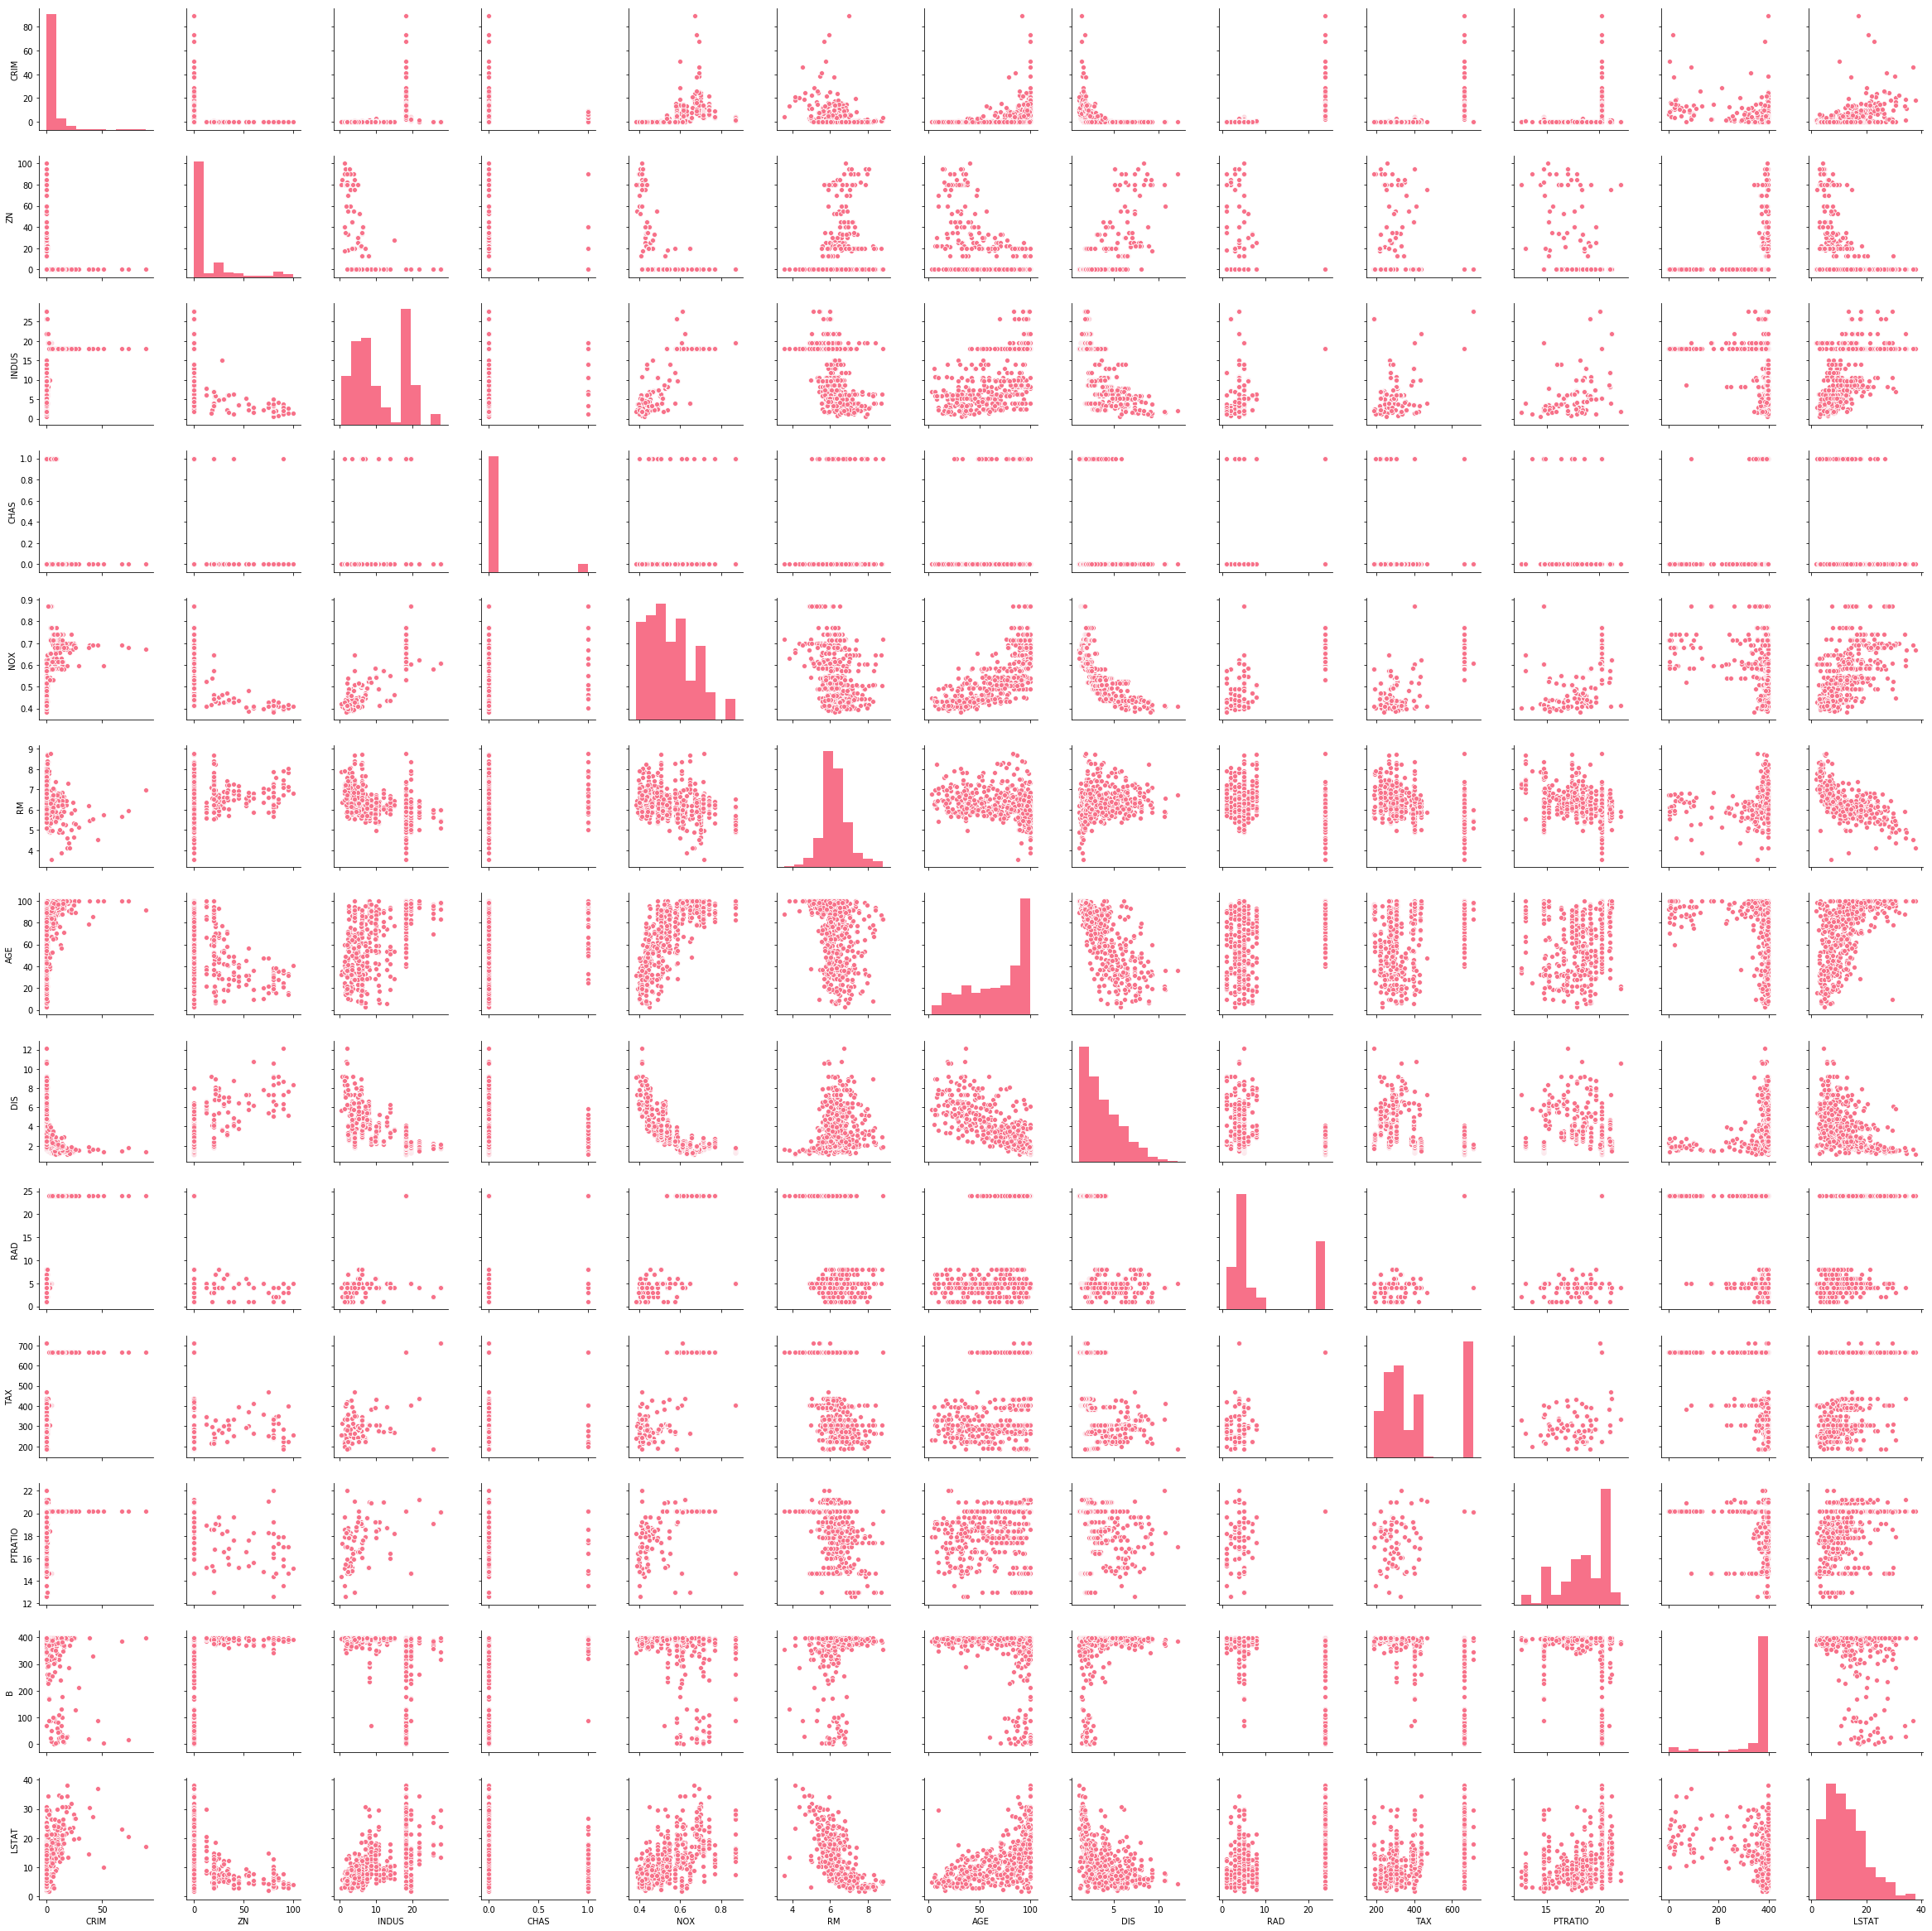

In [0]:
sns.pairplot(X, height=2.5)
plt.tight_layout()

## Modelo lineal

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(y, y_pred)

0.7406426641094095

## Pero que esta pasando?

Tomemos dos variables arbitrarias del conjunto de datos anterior que parecen estar correlacionadas, y usemos las herramientas que tenemos para visualizarlas:

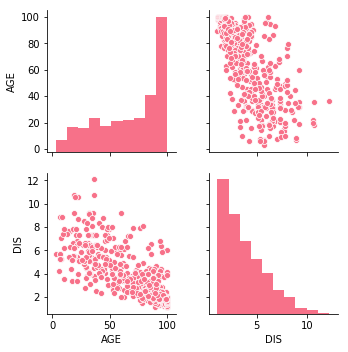

In [0]:
sns.pairplot(X[['AGE','DIS']])

Ahora vamos modificar la estructura de los arreglos para poderlos "alimentar" a las funciones de la librearia y ajustar un modelo lineal, la mejor linea recta, entre los datos

In [0]:
x = X['DIS'].to_numpy().reshape(-1, 1)
y = X['AGE'].to_numpy().reshape(-1, 1)

In [0]:
regr = lr.fit(x,y)

y_pred = lr.predict(x)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
# The coefficients
print("Coeficientes: %.2f \n" % regr.coef_[0][0])
# The mean squared error
print("MSE: %.2f \n"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Coeficientes: -10.00 

MSE: 348.48 

Variance score: 0.56


La grafica de la mejor recta que ajusta a los datos se ve de la siguiente forma

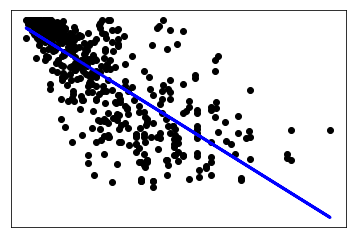

In [0]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()